# 🎓 Logistic Regression trên bộ dữ liệu Sinh viên

## 📌 Mục tiêu
Xây dựng mô hình **Logistic Regression** để dự đoán **kết quả học tập của sinh viên** (ví dụ: `Graduate` hay `Dropout`) dựa trên thông tin cá nhân, học tập và kinh tế - xã hội.  

- **Đầu vào (X):**  
  Thông tin sinh viên như tình trạng hôn nhân, cách nộp hồ sơ, bằng cấp trước đó, kết quả học phần, và các chỉ số kinh tế.  

- **Đầu ra (y):**  
  Biến mục tiêu `Target` với các giá trị có thể gồm:
  - `Graduate` (tốt nghiệp)  
  - `Dropout` (bỏ học)  
  - (có thể có thêm nhãn khác nếu dữ liệu chứa).  

## 🚀 Các bước thực hiện
1. Nạp và khám phá dữ liệu (`student.csv`).  
2. Tiền xử lý dữ liệu: xử lý giá trị khuyết, mã hóa biến phân loại, chuẩn hóa các biến số.  
3. Chia dữ liệu thành **tập huấn luyện** và **tập kiểm tra**.  
4. Huấn luyện mô hình **Logistic Regression**.  
5. Đánh giá mô hình với các chỉ số: **Accuracy, Precision, Recall, F1-score**.  
6. Phân tích hệ số để hiểu các yếu tố ảnh hưởng nhiều nhất đến kết quả của sinh viên.  


In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/student.csv")
print(data.shape)
data.head()

(4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


In [60]:
import plotly.express as px

# 1. Phân bố target
fig1 = px.histogram(data, x="Target", color="Target",
                    title="Phân bố nhãn (Dropout vs Graduate)")
fig1.show()

# 2. Histogram điểm "Previous qualification (grade)"
fig2 = px.histogram(data, x="Previous qualification (grade)", nbins=30,
                    title="Phân bố điểm Previous qualification",
                    color_discrete_sequence=["blue"])
fig2.show()

In [19]:
print(data.duplicated().sum())
print(data.isnull().sum())

0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enr

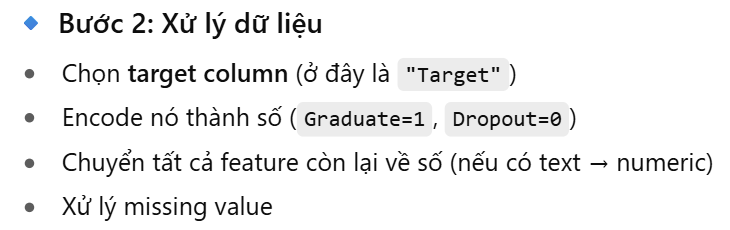

In [43]:
# Biến y (mục tiêu): map sang số và bỏ NaN
y = data["Target"].map({"Dropout": 0, "Graduate": 1}).dropna().astype(int)

# Biến X (toàn bộ feature còn lại, numeric hóa và fill NaN=0)
X = data.loc[y.index].drop(columns=["Target"])  # giữ cùng index với y
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3630, 36)
y shape: (3630,)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale dữ liệu (chuẩn hóa)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9132231404958677
Precision: 0.9123931623931624
Recall   : 0.9510022271714922
F1 Score : 0.9312977099236641
Confusion Matrix:
 [[236  41]
 [ 22 427]]


Classification Report:

              precision    recall  f1-score   support

     Dropout       0.91      0.85      0.88       277
    Graduate       0.91      0.95      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



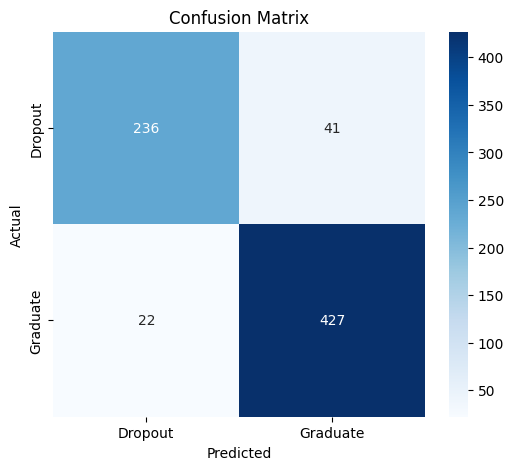

In [61]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Dropout", "Graduate"]))

# 2. Confusion matrix trực quan
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Dropout", "Graduate"], yticklabels=["Dropout", "Graduate"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Lấy 10 sample từ test set
cases = X_test[:20]
true_labels = y_test[:20]

# Dự đoán
pred_labels = model.predict(cases)
pred_probs = model.predict_proba(cases)[:, 1]

# In kết quả
for i, (true, pred, prob) in enumerate(zip(true_labels, pred_labels, pred_probs), 1):
    print(f"Case {i}: True = {'Graduate' if true==1 else 'Dropout'}, "
          f"Pred = {'Graduate' if pred==1 else 'Dropout'}, "
          f"Prob Graduate = {prob:.2f}")

Case 1: True = Graduate, Pred = Graduate, Prob Graduate = 0.59
Case 2: True = Dropout, Pred = Dropout, Prob Graduate = 0.15
Case 3: True = Dropout, Pred = Dropout, Prob Graduate = 0.00
Case 4: True = Graduate, Pred = Graduate, Prob Graduate = 0.92
Case 5: True = Dropout, Pred = Dropout, Prob Graduate = 0.00
Case 6: True = Graduate, Pred = Graduate, Prob Graduate = 0.96
Case 7: True = Dropout, Pred = Dropout, Prob Graduate = 0.05
Case 8: True = Graduate, Pred = Graduate, Prob Graduate = 0.61
Case 9: True = Dropout, Pred = Dropout, Prob Graduate = 0.02
Case 10: True = Dropout, Pred = Dropout, Prob Graduate = 0.00
Case 11: True = Dropout, Pred = Dropout, Prob Graduate = 0.33
Case 12: True = Graduate, Pred = Graduate, Prob Graduate = 0.98
Case 13: True = Graduate, Pred = Graduate, Prob Graduate = 0.91
Case 14: True = Graduate, Pred = Graduate, Prob Graduate = 0.98
Case 15: True = Graduate, Pred = Graduate, Prob Graduate = 0.96
Case 16: True = Dropout, Pred = Dropout, Prob Graduate = 0.04
C